# Experiments Results

In [2]:
from src.utils import plot_score_vs_nshots

%load_ext autoreload
%autoreload 2

## GPT2-XL (1.5B) on TREC, SST-2, AGNews and DBPedia

In [3]:
root_dir = "./"
experiment = "gpt2-xl_trec_sst2_agnews_dbpedia"
calibration = "logloss_affine_100boots"

# !python run_model.py --root_dir $root_dir --config $experiment --use_saved_results
# !python run_calibration.py --root_dir $root_dir --experiment $experiment --config $calibration_config --use_saved_results

Details:
* 0, 1, 4 and 8 shots
* 10 seeds per shot

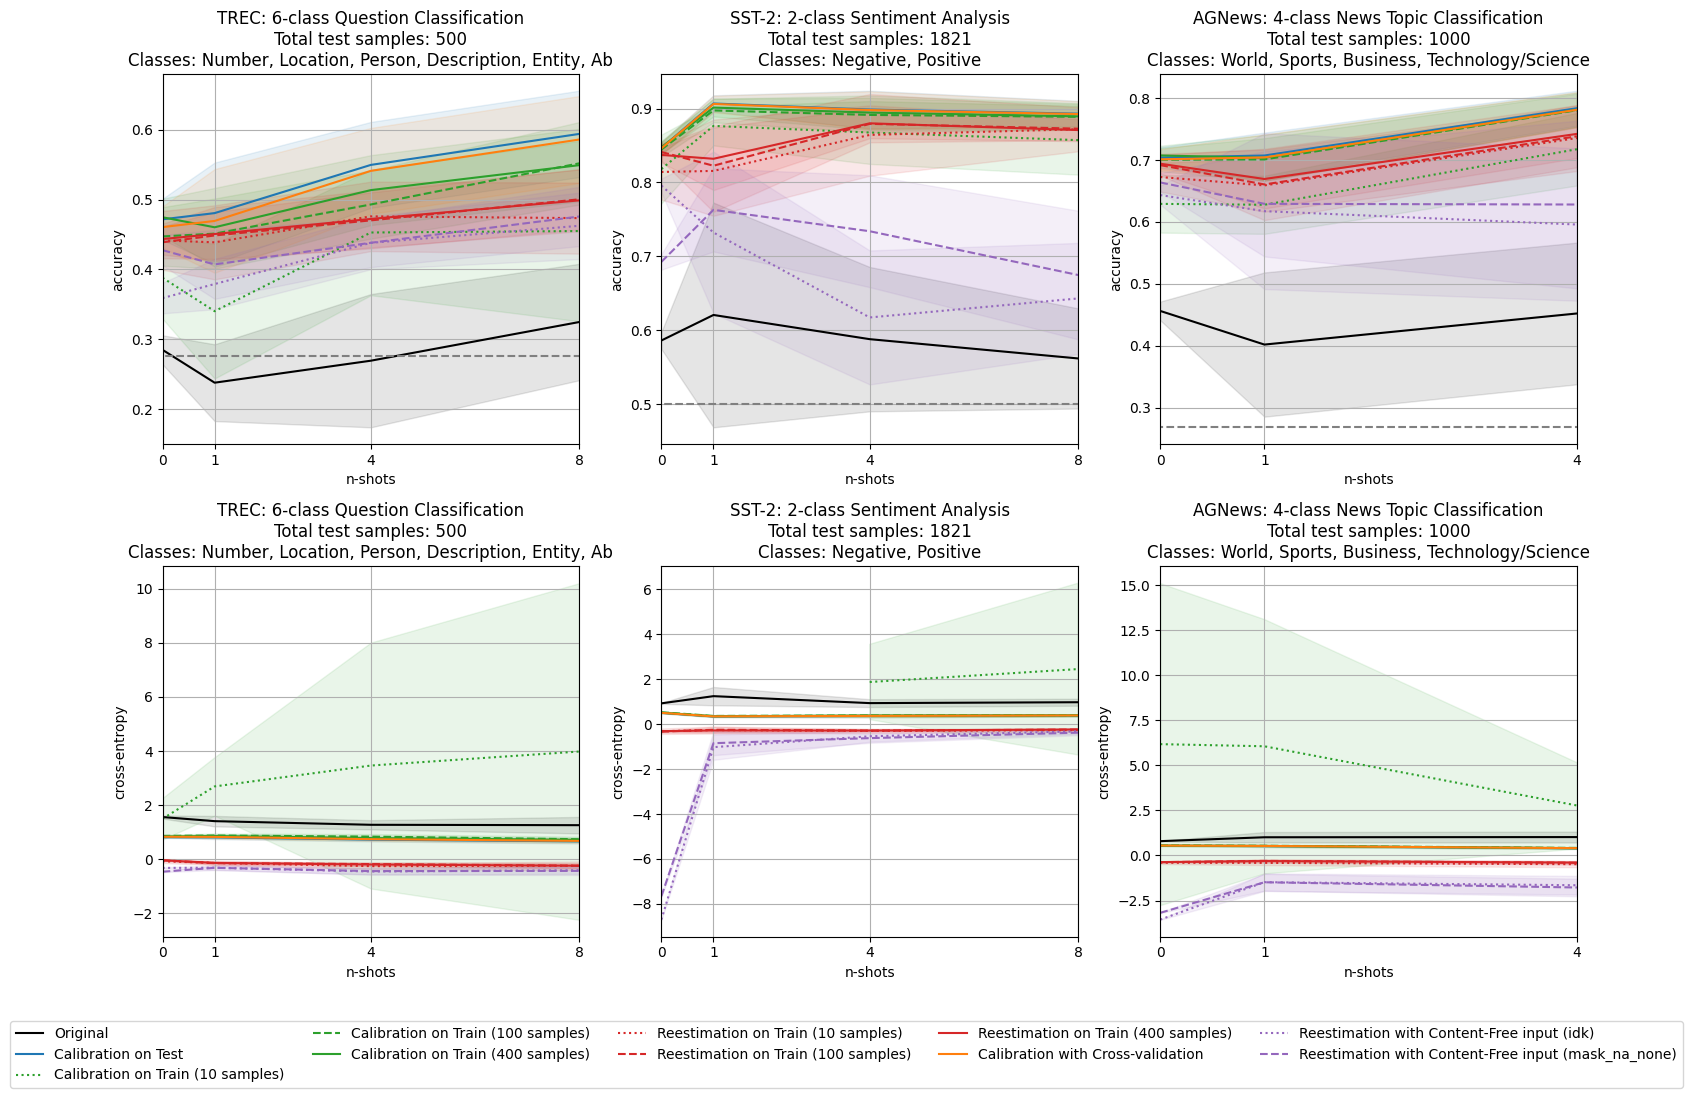

In [8]:
prob_types = None
datasets = ["trec", "sst2", "agnews"]
prob
plot_score_vs_nshots(root_dir, experiment, calibration, plot="line", prob_types=prob_types, datasets=datasets)

In [9]:
import json
from src.utils import get_results_ids_from_config, parse_calibration_args
import pickle

root_dir = "./"
config = "gpt2-xl_trec_sst2_agnews_dbpedia"

with open(f"{root_dir}/configs/{config}.json", "r") as f:
    config = json.load(f)
results_ids = get_results_ids_from_config(root_dir, config)

result_id = results_ids[0]
with open(f"{root_dir}/results/train_test/{result_id}/train.pkl", "rb") as f:
    train_results = pickle.load(f)

train_results.keys()

AttributeError: 'str' object has no attribute 'pop'